In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
def getCSV(csv):
    dfl = pd.read_csv(csv)
    return dfl
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\DrivingTestCounty.csv') 
print(set(df["Statistic Label"]))

{'Driving Tests Not Conducted / Abandoned', 'Driving Test Pass Rate', 'Driving Tests Delivered', 'Driving Test No-Shows'}


In [28]:
time = "2024 June"
filtered_df = df[(df["Month"] == time) & (df["Statistic Label"] == 'Driving Test Pass Rate') & (df["Driving Test Categories"] == "Category B (Car or light van)")]
filtered_df["County"] = filtered_df["County"].apply(lambda x: x[4:].upper())


C:\Users\Tom\AppData\Local\Temp\ipykernel_7632\1737611448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["County"] = filtered_df["County"].apply(lambda x: x[4:].upper())


In [11]:
counties_shapefile = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Ireland_Counties\Counties___Ungen_2019.shp')

In [29]:
merged_data = counties_shapefile.merge(filtered_df, how='left', left_on='ENGLISH', right_on='County')

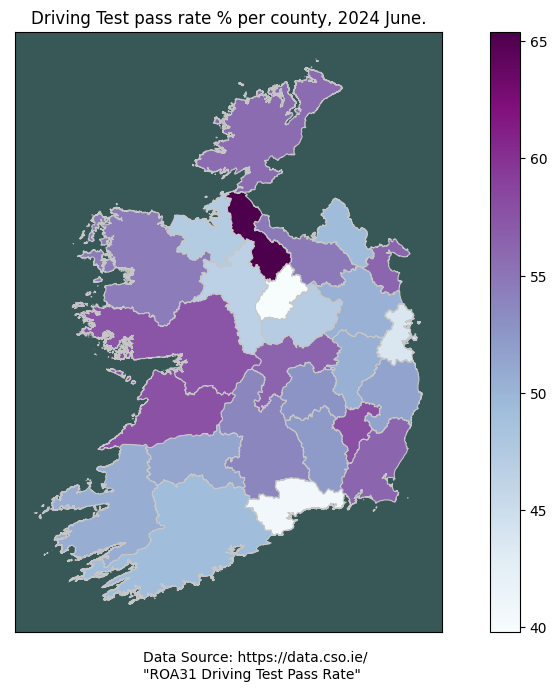

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map
merged_data.plot(column='VALUE', cmap='BuPu', linewidth=0.8, ax=ax, edgecolor='0.78', legend=True)

ax.set_facecolor('#385757') #
title_string = "Driving Test pass rate % per county, {}.".format(time)
ax.set_title(title_string)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.subplots_adjust(left=0.1, right=0.90, top=0.90, bottom=0.15)
plt.text(0.3, -0.077, "Data Source: https://data.cso.ie/ \n\"ROA31 Driving Test Pass Rate\"", ha='left', transform=ax.transAxes)

plt.savefig('DrivingTest-'+str(time)+'.png')

plt.show()